# I. Préparation du dataset

### a. Importer les bibliothèques


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

### b. Chargement des données

In [8]:
print("1. Chargement et préparation des données")
df = pd.read_csv('colon_cancer.csv', sep=";", decimal='.')

# Affichage des informations sur le dataset
print("Dimensions du dataset:", df.shape)
print("\nAperçu des données:")
df.head()

1. Chargement et préparation des données
Dimensions du dataset: (804, 62)

Aperçu des données:


,id_sample,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal


### c. Nettoyage des données

In [9]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())

# Séparer les features (gènes) et la variable cible
# La colonne tissue_status indique si c'est tumoral ou normal
X = df.drop('tissue_status', axis=1)  # Toutes les colonnes sauf tissue_status
y = df['tissue_status']  # Colonne tissue_status

# Affichage des noms des gènes
print("\nNombre de gènes (features):", X.shape[1])
print("Quelques noms de gènes:", X.columns[1:5].tolist())




Valeurs manquantes par colonne:
id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
                ..
GAL              0
CRYL1            0
YBX2             0
ANGPTL4          0
tissue_status    0
Length: 62, dtype: int64

Nombre de gènes (features): 61
Quelques noms de gènes: ['ADH1C', 'DHRS11', 'UGP2', 'SLC7A5']


In [10]:
# Conversion des valeurs catégorielles (tumoral/normal) en valeurs numériques (1/0)
y_encoded = y.map({'tumoral': 1, 'normal': 0})
print("\nDistribution des classes après encodage:")
print(y_encoded.value_counts())
print(f"0 (normal): {y_encoded.value_counts()[0]} échantillons")
print(f"1 (tumoral): {y_encoded.value_counts()[1]} échantillons")

# Utiliser y_encoded pour la suite du code au lieu de y
y = y_encoded


Distribution des classes après encodage:
tissue_status
0    402
1    402
Name: count, dtype: int64
0 (normal): 402 échantillons
1 (tumoral): 402 échantillons


### d. Standardisation les données

In [11]:
first_col_name = X.columns[0]
print(f"\nPremière colonne: {first_col_name}")
print(X[first_col_name].head())

# Si la première colonne est un ID, la supprimer
if 'EPSM-COLON' in first_col_name or not pd.api.types.is_numeric_dtype(X[first_col_name]):
    print(f"\nSuppression de la colonne ID: {first_col_name}")
    X = X.drop(columns=[first_col_name])
    print(f"Nombre de colonnes après suppression: {X.shape[1]}")

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("========")
print("Données standardisées:")
print(X_scaled_df.head())



Première colonne: id_sample
0    EPSM-COLON-0001
1    EPSM-COLON-0002
2    EPSM-COLON-0003
3    EPSM-COLON-0004
4    EPSM-COLON-0005
Name: id_sample, dtype: object

Suppression de la colonne ID: id_sample
Nombre de colonnes après suppression: 60
Données standardisées:
      ADH1C    DHRS11      UGP2    SLC7A5      CTSS       DAO    NIBAN1  \
0  1.250302  1.213208  1.308709 -0.402441  1.069333  0.883677 -1.066357   
1  0.754362  1.169811  0.661934 -0.894972 -0.285198  0.667306  2.197470   
2  0.806745  1.070505  1.182806 -0.821418  1.112207  0.557022 -0.803244   
3  1.199615  1.169811  1.324862 -1.336299 -0.983900  0.557022  0.553243   
4  0.151961  1.004301  0.330470 -0.232982 -0.834178  0.593784  0.388820   

     PRUNE2     FOXF2    TENT5C  ...     SYTL2     BSPRY     CDHR2    ERRFI1  \
0 -1.473378 -0.029728  2.141614  ...  0.334385  0.922742 -0.437618 -1.958572   
1 -0.950125 -0.066988  0.817456  ...  0.636176  1.079233  0.262091  0.163029   
2 -0.343239 -0.113065  0.495363  ...  0

### e. Division des données en ensembles d'entraînement et de test

In [12]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ensemble d'entraînement: {X_train.shape}, Ensemble de test: {X_test.shape}")


Ensemble d'entraînement: (643, 60), Ensemble de test: (161, 60)


# II. Exploration des données

### a. Analysez la distribution des classes 

In [13]:
# Vérification de la distribution des classes
print("=============")
print("\nDistribution des classes:")
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)



Distribution des classes:
tissue_status
0    402
1    402
Name: count, dtype: int64
tissue_status
0    50.0
1    50.0
Name: proportion, dtype: float64


### b. Analyse statistiques descriptives des gènes

In [14]:
# Statistiques descriptives des gènes
print("Statistiques descriptives des gènes:")
print(X.describe())

Statistiques descriptives des gènes:
            ADH1C      DHRS11        UGP2      SLC7A5        CTSS         DAO  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     5.588943    4.354817    5.557694    4.513570    6.717535    7.218184   
std      2.889901    1.431179    1.150565    1.614450    1.077821    1.411969   
min      0.610504    1.427079    2.027201    1.685024    3.668691    1.164886   
25%      3.174250    3.118844    4.611060    3.030022    6.065937    6.241714   
50%      5.467024    4.125990    5.412204    4.382953    6.762908    7.578782   
75%      8.444756    5.696566    6.556969    5.918848    7.485487    8.263561   
max     10.263846    7.022241    7.571114    8.059430    8.990703   10.079135   

           NIBAN1      PRUNE2       FOXF2      TENT5C  ...       SYTL2  \
count  804.000000  804.000000  804.000000  804.000000  ...  804.000000   
mean     2.737937    2.806573    3.064394    3.658318  ...    3.599294   
std      1.

### c. Visualisation de la distribution des données

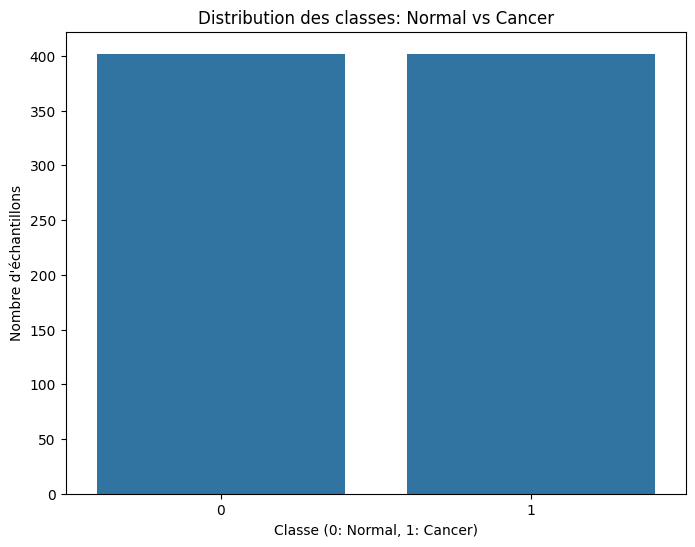

In [15]:
# Visualisation de la distribution des classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution des classes: Normal vs Cancer')
plt.xlabel('Classe (0: Normal, 1: Cancer)')
plt.ylabel('Nombre d\'échantillons')
plt.show()

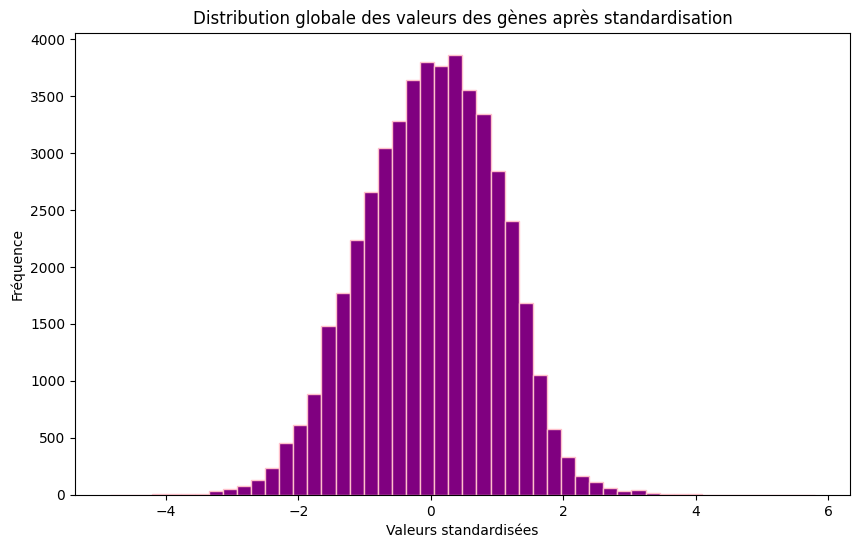

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(X_scaled_df.values.flatten(), bins=50, color='purple', edgecolor='pink')
plt.title("Distribution globale des valeurs des gènes après standardisation")
plt.xlabel("Valeurs standardisées")
plt.ylabel("Fréquence")
plt.show()

# III. Application des algorithmes de classification

In [17]:
# Stockage des résultats pour comparaison
results = []

##### 1. Régression logistique

In [18]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

###### 2. Support Vector Machine (SVM)


In [19]:
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

###### 3. k-Nearest Neighbors (k-NN)



In [20]:
# Recherche du meilleur k
k_range = list(range(1, 31, 2))
param_grid = {'n_neighbors': k_range}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
knn_cv.fit(X_train, y_train)

best_k = knn_cv.best_params_['n_neighbors']
print(f"Meilleur k trouvé: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

Meilleur k trouvé: 1


###### 4. Arbre de décision


In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

###### 5. Forêt aléatoire

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# IV .Évaluation des modèles

##### 1. Fonction pour évaluer un modèle

In [23]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    # Calcul des métriques
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    
    # Calcul de la courbe ROC
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Affichage des résultats
    print(f"\n--- Évaluation du modèle: {model_name} ---")
    print(f"Précision: {accuracy:.4f}")
    print("\nMatrice de confusion:")
    print(conf_matrix)
    print("\nRapport de classification:")
    print(class_report)
    
    # Visualisation de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Cancer'], 
                yticklabels=['Normal', 'Cancer'])
    plt.title(f'Matrice de confusion - {model_name}')
    plt.xlabel('Prédiction')
    plt.ylabel('Réalité')
    plt.show()
    
    # Visualisation de la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return accuracy, roc_auc

##### 2. Évaluation de la régression logistique


--- Évaluation du modèle: Régression logistique ---
Précision: 1.0000

Matrice de confusion:
[[81  0]
 [ 0 80]]

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



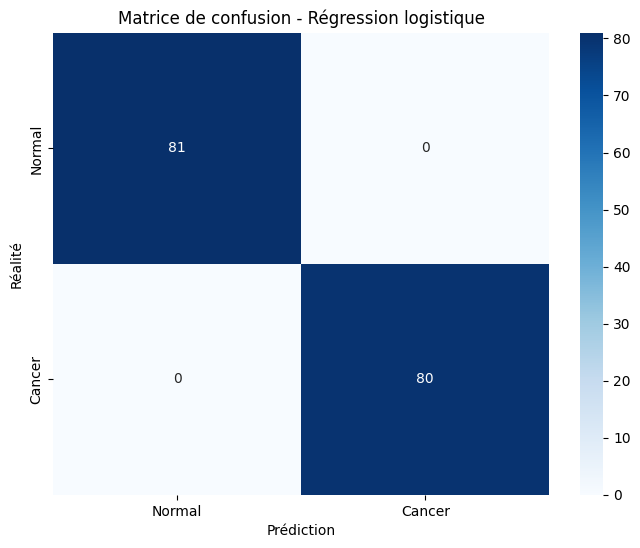

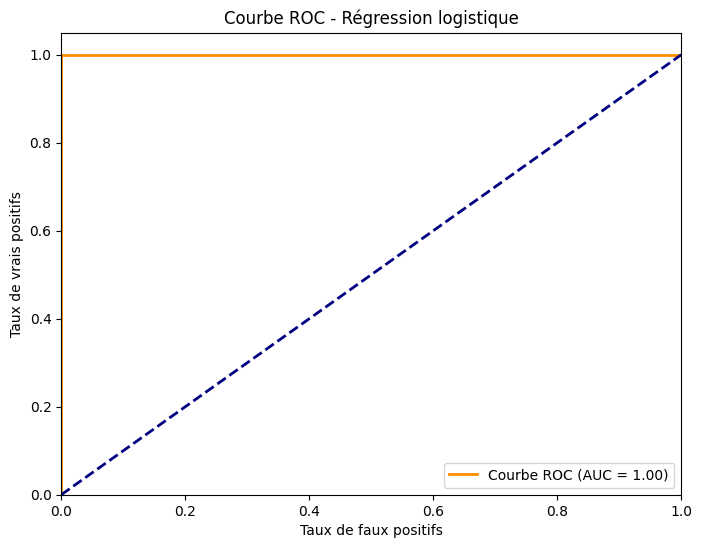


Top 10 gènes les plus importants (Régression logistique):
       gene  importance
44    RNF43    0.926745
3    SLC7A5    0.892605
2      UGP2    0.723546
5       DAO    0.708372
26  NEURL1B    0.648853
13    NCAPH    0.570452
27    DDIT4    0.489681
8     FOXF2    0.458796
0     ADH1C    0.458544
54    CLIC5    0.454385


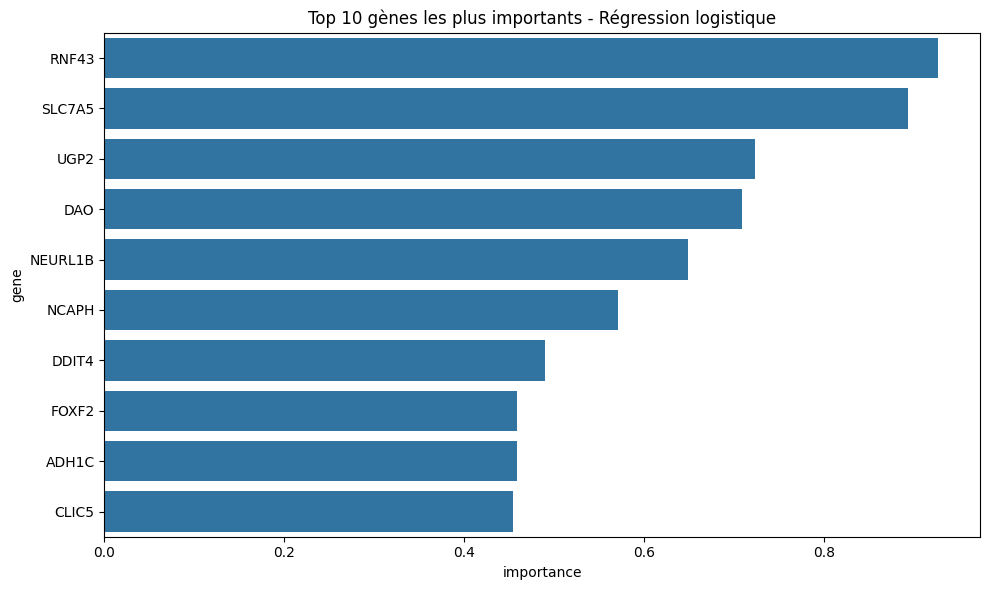

In [24]:
logreg_acc, logreg_auc = evaluate_model(y_test, y_pred_logreg, y_prob_logreg, "Régression logistique")
results.append({"Modèle": "Régression logistique", "Accuracy": logreg_acc, "AUC": logreg_auc})

# Extraction des caractéristiques importantes pour la régression logistique
if hasattr(logreg, "coef_") and logreg.coef_ is not None:
    logreg_feat = pd.DataFrame({
        'gene': X_train.columns,
        'importance': abs(logreg.coef_[0])  # Utiliser la valeur absolue pour l'importance
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 gènes les plus importants (Régression logistique):")
    print(logreg_feat.head(10))
    
    # Visualisation des 10 gènes les plus importants
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='gene', data=logreg_feat.head(10))
    plt.title('Top 10 gènes les plus importants - Régression logistique')
    plt.tight_layout()
    plt.show()


##### 3. Évaluation du SVM


--- Évaluation du modèle: SVM ---
Précision: 1.0000

Matrice de confusion:
[[81  0]
 [ 0 80]]

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



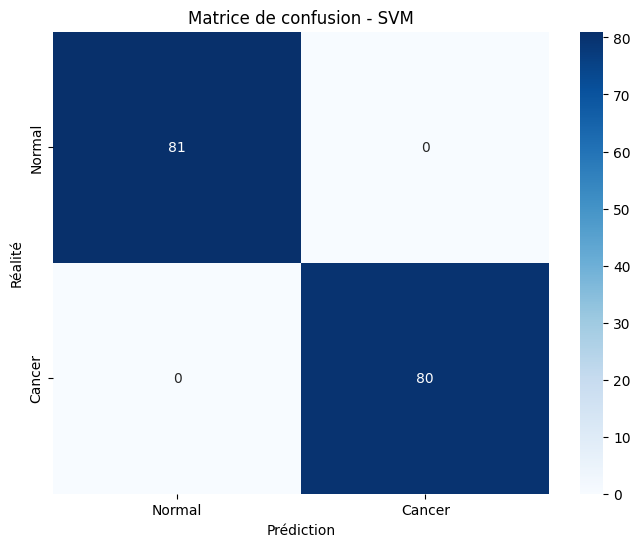

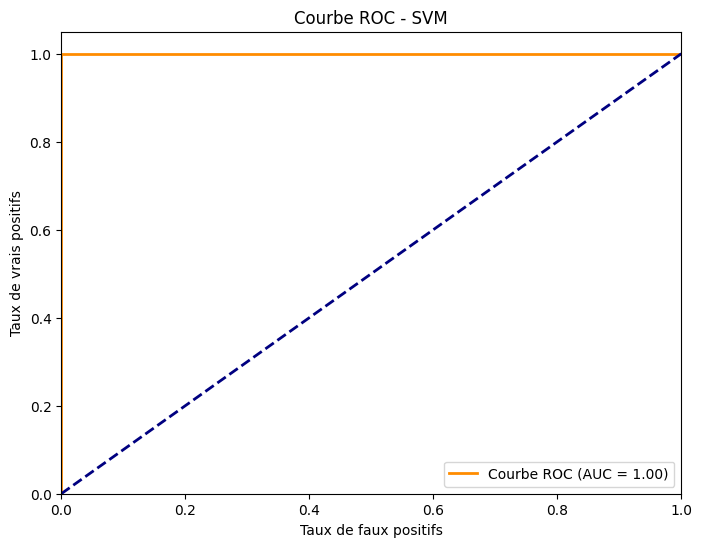


Top 10 gènes les plus importants (SVM):
       gene  importance
44    RNF43    0.312998
3    SLC7A5    0.282485
5       DAO    0.200198
2      UGP2    0.185389
13    NCAPH    0.176562
9    TENT5C    0.169138
6    NIBAN1    0.159070
8     FOXF2    0.157270
0     ADH1C    0.149958
26  NEURL1B    0.148545


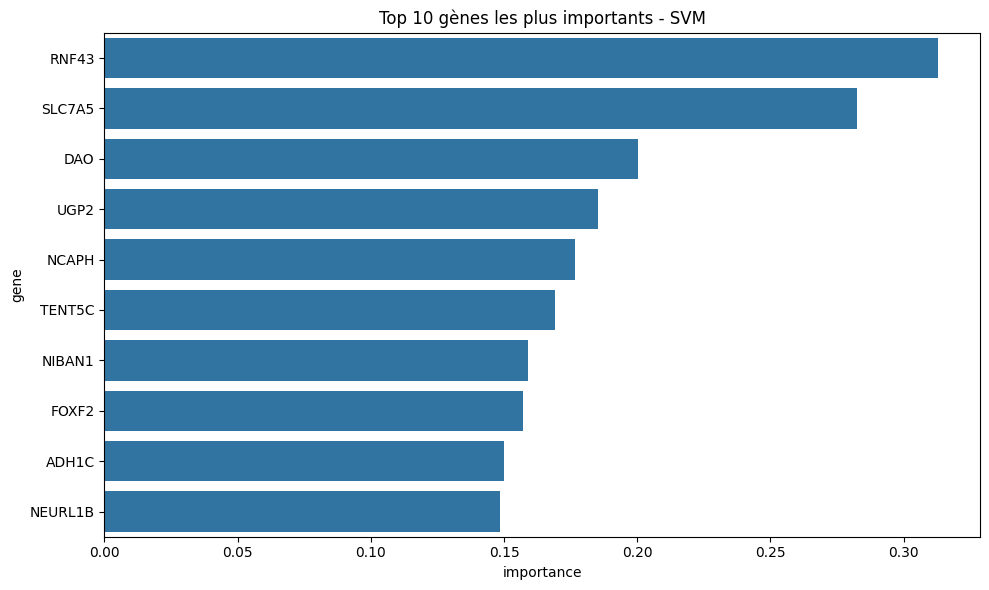

In [25]:
svm_acc, svm_auc = evaluate_model(y_test, y_pred_svm, y_prob_svm, "SVM")
results.append({"Modèle": "SVM", "Accuracy": svm_acc, "AUC": svm_auc})

# Extraction des caractéristiques importantes pour SVM
if hasattr(svm, "coef_") and svm.coef_ is not None:
    svm_feat = pd.DataFrame({
        'gene': X_train.columns,
        'importance': abs(svm.coef_[0])  # Utiliser la valeur absolue pour l'importance
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 gènes les plus importants (SVM):")
    print(svm_feat.head(10))
    
    # Visualisation des 10 gènes les plus importants
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='gene', data=svm_feat.head(10))
    plt.title('Top 10 gènes les plus importants - SVM')
    plt.tight_layout()
    plt.show()


##### 4. Évaluation du k-NN


--- Évaluation du modèle: k-NN (k=1) ---
Précision: 1.0000

Matrice de confusion:
[[81  0]
 [ 0 80]]

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



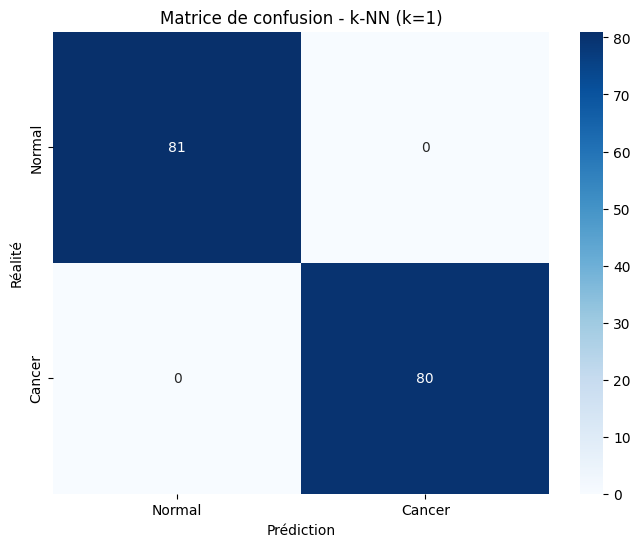

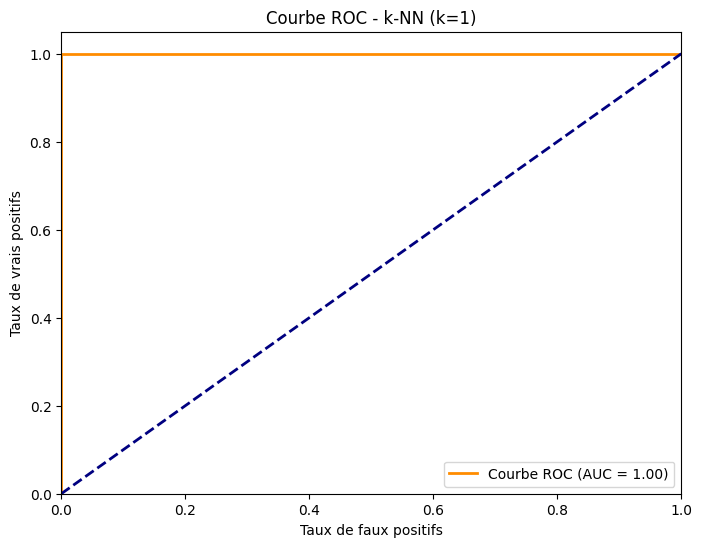

In [26]:
knn_acc, knn_auc = evaluate_model(y_test, y_pred_knn, y_prob_knn, f"k-NN (k={best_k})")
results.append({"Modèle": f"k-NN (k={best_k})", "Accuracy": knn_acc, "AUC": knn_auc})

##### 5. Évaluation de l'arbre de décision


--- Évaluation du modèle: Arbre de décision ---
Précision: 0.9814

Matrice de confusion:
[[78  3]
 [ 0 80]]

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.96      1.00      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



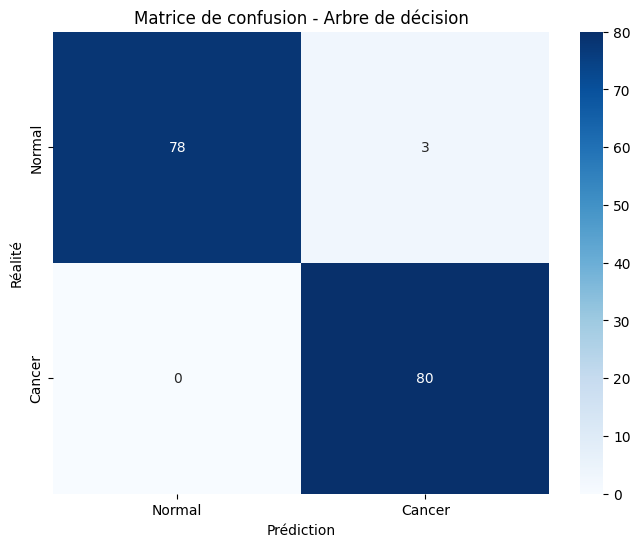

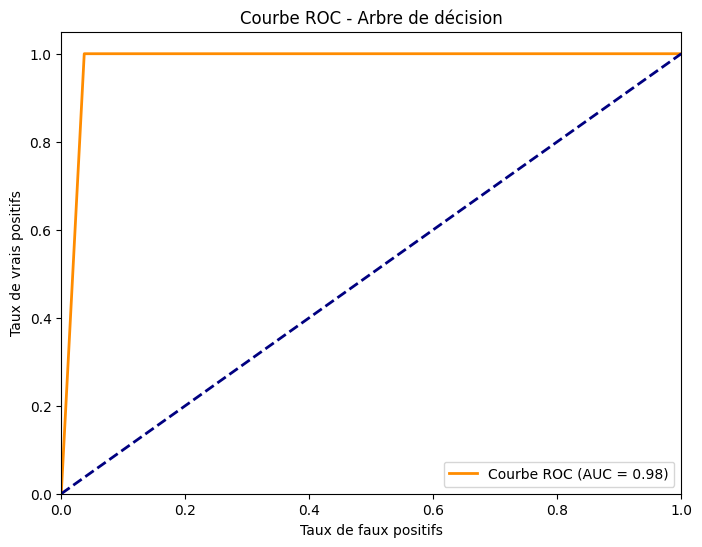


Top 10 gènes les plus importants (Arbre de décision):
      gene  importance
2     UGP2    0.921483
1   DHRS11    0.053791
25    SIAE    0.012364
44   RNF43    0.012362
4     CTSS    0.000000
5      DAO    0.000000
6   NIBAN1    0.000000
7   PRUNE2    0.000000
8    FOXF2    0.000000
9   TENT5C    0.000000


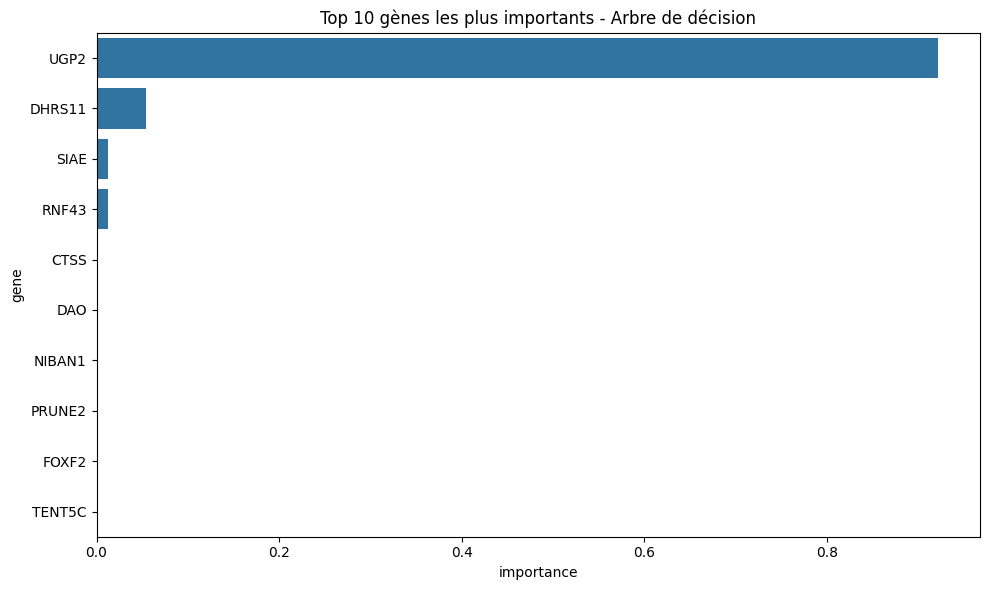

In [27]:
dt_acc, dt_auc = evaluate_model(y_test, y_pred_dt, y_prob_dt, "Arbre de décision")
results.append({"Modèle": "Arbre de décision", "Accuracy": dt_acc, "AUC": dt_auc})

# Extraction des caractéristiques importantes pour l'arbre de décision
if hasattr(dt, "feature_importances_") and dt.feature_importances_ is not None:
    dt_feat = pd.DataFrame({
        'gene': X_train.columns,
        'importance': dt.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 gènes les plus importants (Arbre de décision):")
    print(dt_feat.head(10))
    
    # Visualisation des 10 gènes les plus importants
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='gene', data=dt_feat.head(10))
    plt.title('Top 10 gènes les plus importants - Arbre de décision')
    plt.tight_layout()
    plt.show()

##### 5. Évaluation de la forêt aléatoire


--- Évaluation du modèle: Forêt aléatoire ---
Précision: 0.9876

Matrice de confusion:
[[79  2]
 [ 0 80]]

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.98      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



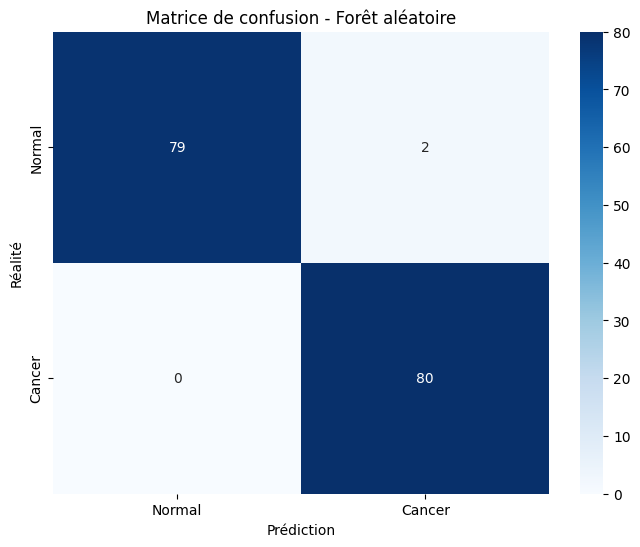

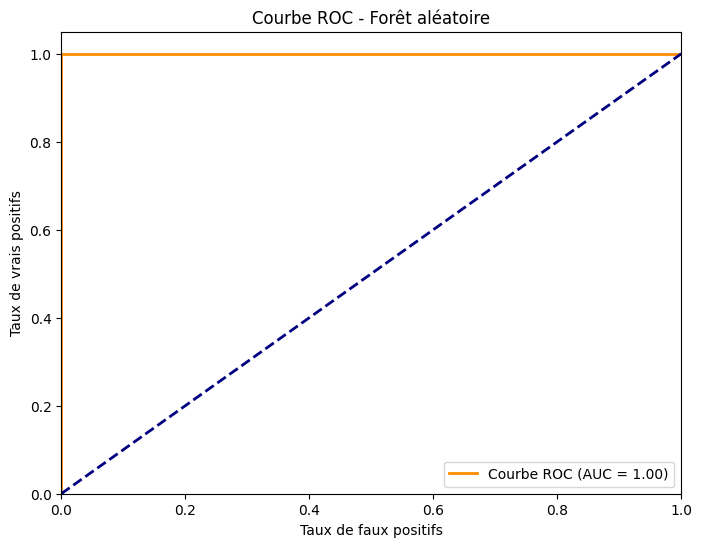


Top 10 gènes les plus importants (Forêt aléatoire):
       gene  importance
2      UGP2    0.171861
5       DAO    0.145784
3    SLC7A5    0.103186
44    RNF43    0.091354
0     ADH1C    0.067812
26  NEURL1B    0.066113
1    DHRS11    0.045813
8     FOXF2    0.044275
25     SIAE    0.024829
47    PAQR5    0.018763


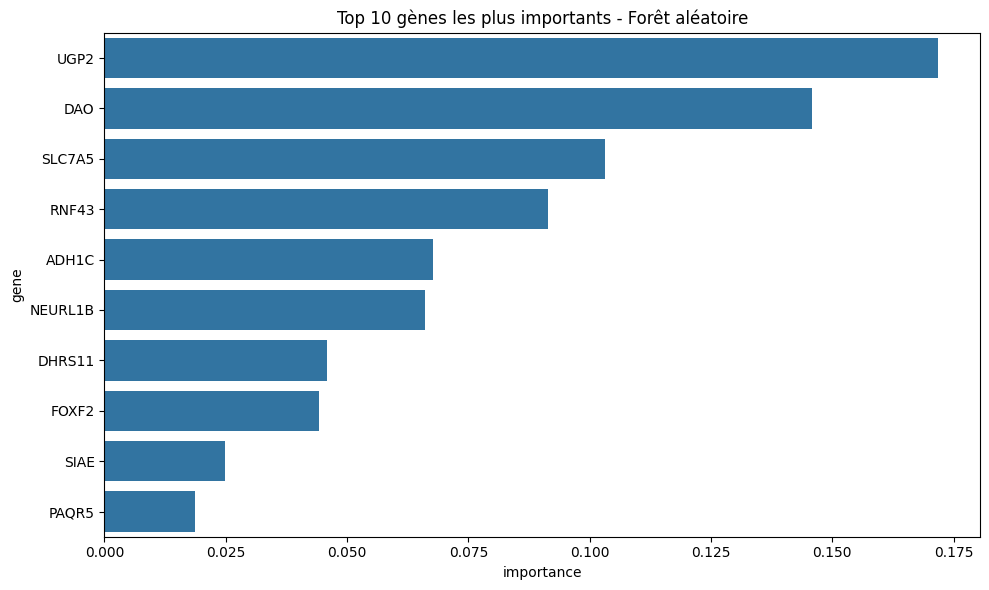

In [28]:
rf_acc, rf_auc = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Forêt aléatoire")
results.append({"Modèle": "Forêt aléatoire", "Accuracy": rf_acc, "AUC": rf_auc})

# Extraction des caractéristiques importantes pour la forêt aléatoire
if hasattr(rf, "feature_importances_") and rf.feature_importances_ is not None:
    rf_feat = pd.DataFrame({
        'gene': X_train.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 gènes les plus importants (Forêt aléatoire):")
    print(rf_feat.head(10))
    
    # Visualisation des 10 gènes les plus importants
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='gene', data=rf_feat.head(10))
    plt.title('Top 10 gènes les plus importants - Forêt aléatoire')
    plt.tight_layout()
    plt.show()


##### 6. Comparaison des modèles

                  Modèle  Accuracy       AUC
0  Régression logistique  1.000000  1.000000
1                    SVM  1.000000  1.000000
2             k-NN (k=1)  1.000000  1.000000
3      Arbre de décision  0.981366  0.981481
4        Forêt aléatoire  0.987578  1.000000


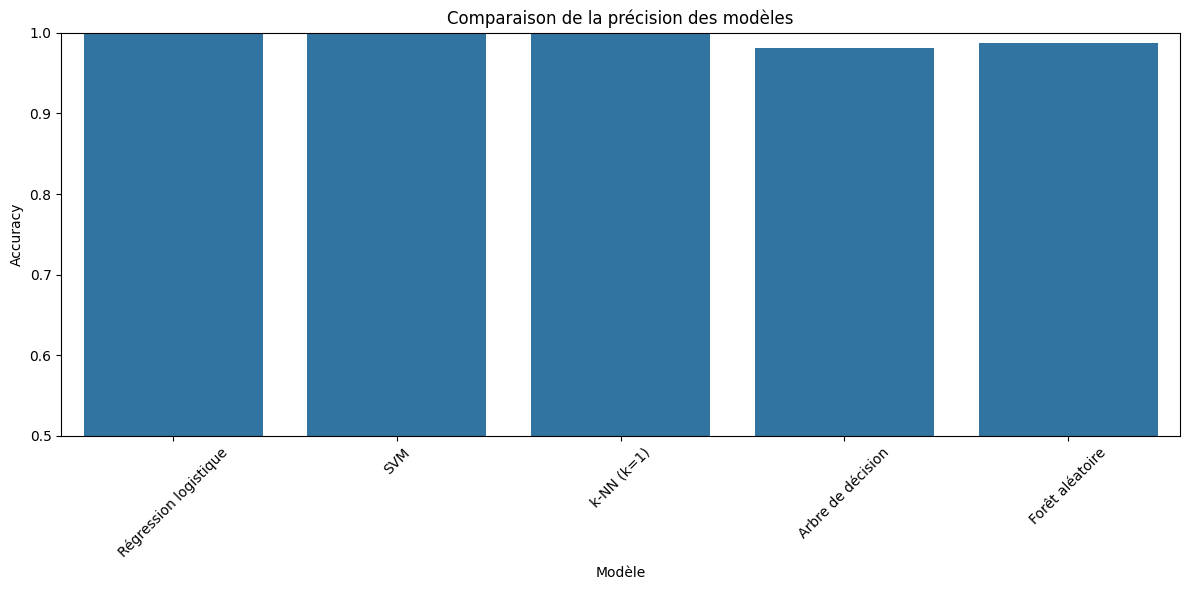

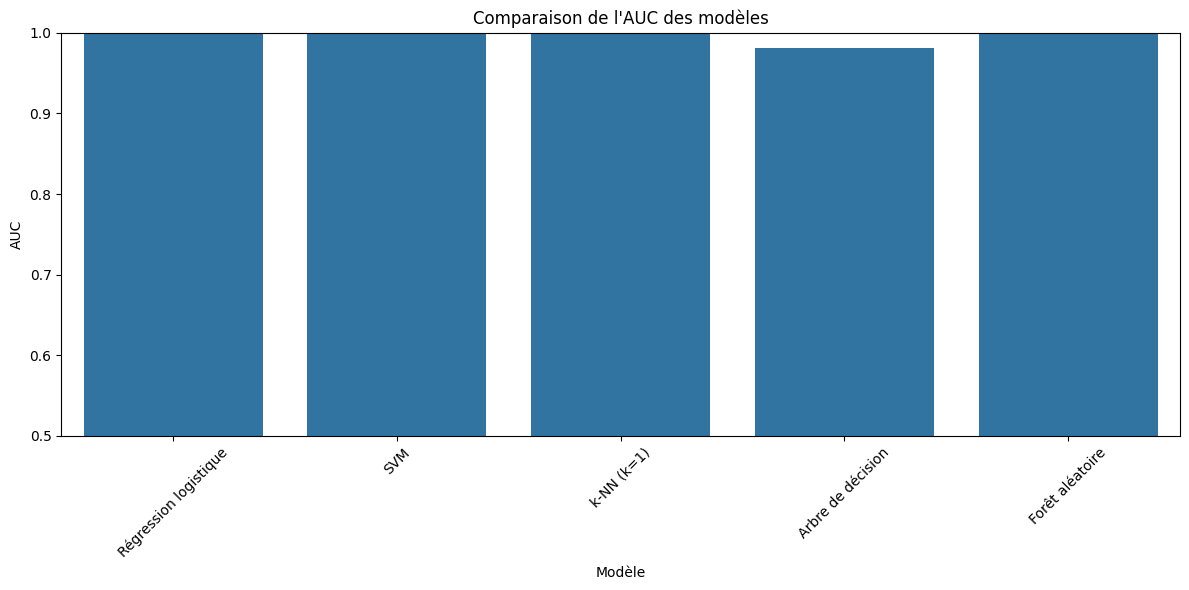

In [29]:
results_df = pd.DataFrame(results)
print(results_df)

# Visualisation des performances des modèles
plt.figure(figsize=(12, 6))
sns.barplot(x='Modèle', y='Accuracy', data=results_df)
plt.title('Comparaison de la précision des modèles')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Modèle', y='AUC', data=results_df)
plt.title('Comparaison de l\'AUC des modèles')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# V. Cas Pratique

In [34]:
# Sélectionner uniquement les gènes d'intérêt pour l'entraînement
genes_of_interest = ['RNF43', 'SLC7A5', 'DAO']
X_selected = X[genes_of_interest]

# Standardiser ces données sélectionnées
scaler_selected = StandardScaler()
X_scaled_selected = scaler_selected.fit_transform(X_selected)
X_scaled_df_selected = pd.DataFrame(X_scaled_selected, columns=genes_of_interest)

# Diviser en ensembles d'entraînement et de test
X_train_sel, X_test_sel, y_train, y_test = train_test_split(
    X_scaled_df_selected, y, test_size=0.2, random_state=42, stratify=y)

# Entraîner un modèle sur ces gènes seulement
model_selected = LogisticRegression(max_iter=1000, random_state=42)
model_selected.fit(X_train_sel, y_train)

# Maintenant la prédiction fonctionnera avec seulement ces 3 gènes
patient_data = pd.DataFrame({'RNF43': [4.68], 'SLC7A5': [4.10], 'DAO': [7.59]})
patient_scaled = scaler_selected.transform(patient_data)
prediction = model_selected.predict(patient_scaled)[0]
proba = model_selected.predict_proba(patient_scaled)[0][1]

# Affichage du résultat
print(f"Prédiction : {'Cancer' if prediction == 1 else 'Normal'}")
print(f"Probabilité d'avoir un cancer : {proba:.2%}")


Prédiction : Normal
Probabilité d'avoir un cancer : 34.91%
